# Homework 4

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 
* What is the preferred measure of the term spread in the case?
* What evidence is cited for the term spread's power in predicting recessions?
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

Using the file `yields.xlsx`, calculate the term spread at the end of the sample.
* What does this term spread suggest about economic growth, according to the evidence of Estrella?

***

**The term spread is the difference between long-term and short-term interest rates.**

**The case uses the 10-year Treasury bond yield minus the 3-month Treasury bill yield as the preferred measure.**


**The Federal Reserve found that an inverted yield curve (meaning a negative term spread) has preceded nearly every recession since 1950.**

**The level of the term spread is the most important because a persistently low or negative spread strongly signals a potential recession, while short-term changes/absolute level of short rates are less predictive.**

In [1]:
import pandas as pd

yields_df = pd.read_excel("../data/yields.xlsx")
yields_df.tail()

,caldt,1,2,5,7,10,20,30
15863,2024-12-24,4.263383,4.288041,4.395862,4.481357,4.531450,4.842907,4.712979
15864,2024-12-26,4.245134,4.282515,4.378693,4.460309,4.522614,4.836411,4.712016
15865,2024-12-27,4.220121,4.268950,4.404594,4.493999,4.567839,4.888583,4.763756
15866,2024-12-30,4.203386,4.206418,4.318682,4.410217,4.489640,4.827387,4.712148
15867,2024-12-31,4.170459,4.181058,4.339915,4.431660,4.525234,4.801754,4.734187


In [2]:
latest_data = yields_df.iloc[-1]
term_spread = latest_data[10] - latest_data[1] #we are making the assumption 1 means a 3 month t bill
term_spread

0.3547751607569998

**Estrella's evidence suggests that a positive spread (in this case ~0.35) indicates strong economic growth over the next 4 to 6 quarters.**

## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?
* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

**The term premium is the extra return investors demand for holding long-term bonds instead of rolling over short-term bonds. We can't observe it because it depends on investor expectations/risk perceptions which can't be directly measured**

**As for the equations, Eq. 1 shows the 10 yr interest rate should be a sum of short term interest rates plus term premium. Eq. 2 shows the term spread equals the expected changes in short term rates plus the term premium.**

**Sack argues that if the term spread changes because of shifts in the term premium rather than expected short-term rates, the yield curve becomes less reliable for predicting economic growth. This weakens Estrella’s recession forecasts.**

## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
* What does a downward-sloping yield curve predict about future short-term rates? 
* In this case, is it risky to hold long-term bonds or short-term bonds? Is this risk compensated?

Suppose the term premium increases 5 percentage points.
* What would change about your previous answer?

**If the term premium is zero, a downward-sloping yield curve predicts that future short-term rates will decline. In this case, long-term bonds are riskier because their prices drop if rates rise, but this risk is not compensated since the term premium is zero.**

**If the term premium increases by 5 percentage points, long-term bonds would now offer higher yields, compensating investors for holding them despite the risk.**

# 2 Forward Curve from the Spot Curve

Use the data in `'../data/treasury_quotes_2024-10-31.xlsx`, focusing on the selected data found in the sheet `selected quotes`.

In [3]:
treasury_df = pd.read_excel("../data/treasury_quotes_2024-10-31.xlsx", sheet_name="selected quotes")
treasury_df.head()

,KYTREASNO,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm
0,208042,note,2024-10-31,2023-04-30,2025-04-30,0.495551,0,3.875,99.712500,99.722203,99.717351,0,99.717351,0.044933
1,208129,note,2024-10-31,2023-10-31,2025-10-31,0.999316,0,5.000,100.641406,100.660819,100.651113,0,100.651113,0.043311
2,208213,note,2024-10-31,2024-04-30,2026-04-30,1.494867,0,4.875,100.929688,100.960938,100.945312,0,100.945312,0.042327
3,208302,note,2024-10-31,2024-10-31,2026-10-31,1.998631,0,4.125,99.933594,99.941406,99.937500,0,99.937500,0.041611
4,207875,note,2024-10-31,2022-04-30,2027-04-30,2.494182,0,2.750,96.750000,96.781250,96.765625,0,96.765625,0.041346


### 2.1 
Bootstrap the discount factor. 

Plot the answer in terms of discount factors and discount rates.

Though the time-to-maturity (ttm) is not spaced exactly at 6 months, for the purposes of this problem, you are welcome to approximate that they are spaced at exact 6-month intervals.

***

In [4]:
import numpy as np
import matplotlib.pyplot as plt

treasury_df["discount_factor"] = 1 / (1 + treasury_df["ytm"] / 2) ** (2 * treasury_df["ttm"])
treasury_df["discount_rate"] = -np.log(treasury_df["discount_factor"]) / treasury_df["ttm"]

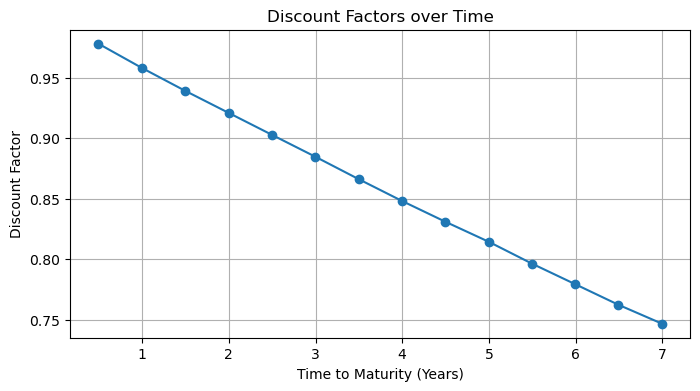

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(treasury_df["ttm"], treasury_df["discount_factor"], marker="o", linestyle="-")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Discount Factor")
plt.title("Discount Factors over Time")
plt.grid()
plt.show()

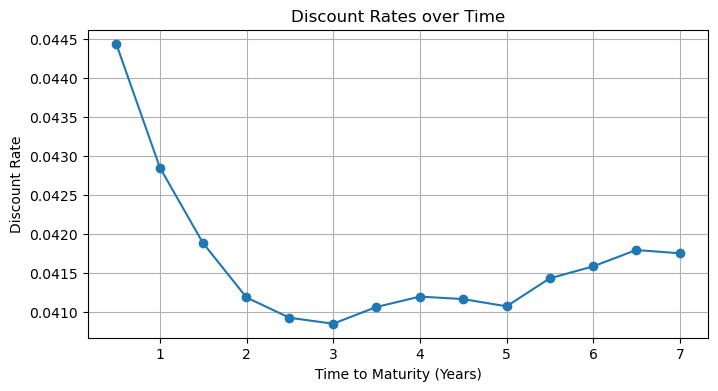

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(treasury_df["ttm"], treasury_df["discount_rate"], marker="o", linestyle="-")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Discount Rate")
plt.title("Discount Rates over Time")
plt.grid()
plt.show()

### 2.2
Calculate and plot the forward discount factors from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.

In [7]:
T_values = np.arange(0.5, 6.5, 0.5)
forward_discount_factors = []

for i in range(len(T_values) - 1):
    T, T_next = T_values[i], T_values[i + 1]
    DF_T = 1 / (1 + treasury_df["ytm"].iloc[i] / 2) ** (2 * T)
    DF_T_next = 1 / (1 + treasury_df["ytm"].iloc[i + 1] / 2) ** (2 * T_next)
    forward_DF = DF_T_next / DF_T
    forward_discount_factors.append(forward_DF)

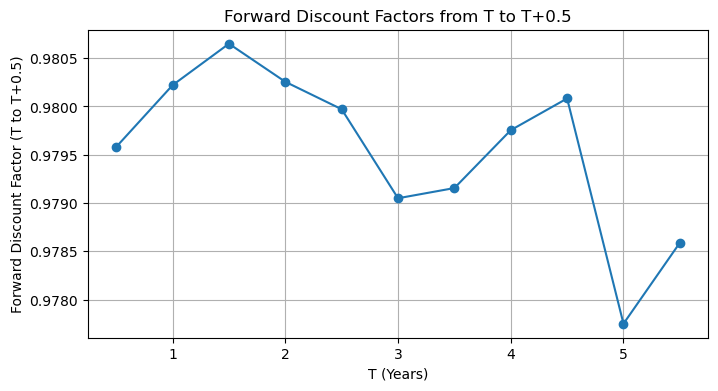

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(T_values[:-1], forward_discount_factors, marker="o", linestyle="-")
plt.xlabel("T (Years)")
plt.ylabel("Forward Discount Factor (T to T+0.5)")
plt.title("Forward Discount Factors from T to T+0.5")
plt.grid()
plt.show()

### 2.3
Use the forward discount factors to calculate the `semiannually` compounded forward **rates**.

Plot the curve.

In [9]:
forward_rates = []
for i in range(len(forward_discount_factors)):
    T, T_next = T_values[i], T_values[i + 1]
    fwd_rate = (1 / forward_discount_factors[i]) ** (2 / (T_next - T)) - 1
    forward_rates.append(fwd_rate)

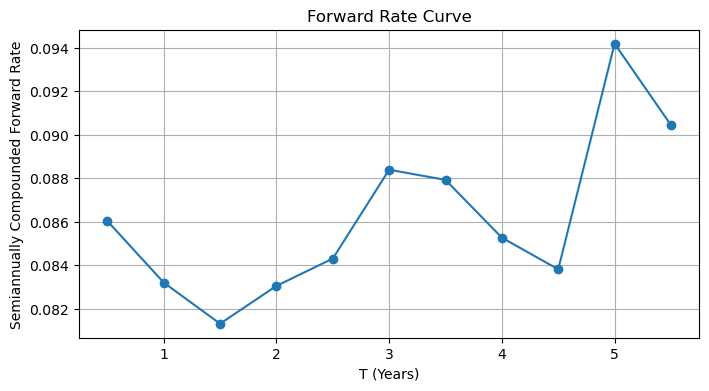

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(T_values[:-1], forward_rates, marker="o", linestyle="-")
plt.xlabel("T (Years)")
plt.ylabel("Semiannually Compounded Forward Rate")
plt.title("Forward Rate Curve")
plt.grid()
plt.show()

#### 2.4

Specifically report the forward-rate values from 

* $T_1=0.5$ to $T_2=1$.
* $T_1=3.5$ to $T_2=4$.

In [11]:
T1_T2_pairs = [(0.5, 1.0), (3.5, 4.0)]


for T1, T2 in T1_T2_pairs:
    idx_T1 = np.where(T_values == T1)[0][0]
    idx_T2 = np.where(T_values == T2)[0][0]
    
    D_T1 = 1 / (1 + treasury_df["ytm"].iloc[idx_T1] / 2) ** (2 * T1)
    D_T2 = 1 / (1 + treasury_df["ytm"].iloc[idx_T2] / 2) ** (2 * T2)
    
    forward_rate = (D_T1 / D_T2) ** (1 / (T2 - T1)) - 1
    
    print(f"Forward rate from T1 = {T1} to T2 = {T2}: {forward_rate:.6f}")

Forward rate from T1 = 0.5 to T2 = 1.0: 0.042125
Forward rate from T1 = 3.5 to T2 = 4.0: 0.043031


# 3. Forward Discount Factors, Forward Rates, and Evolving Spot Rates

Use the data set `famabliss_strips_2024-12-31.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per $1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by stripping out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of `December` in `2020` through `2024`.

In [12]:
zerocoupon_df = pd.read_excel("../data/famabliss_strips_2024-12-31.xlsx")
zerocoupon_df.tail()

,date,1,2,3,4,5
866,2024-08-30,0.957618,0.925447,0.894010,0.862266,0.831964
867,2024-09-30,0.961482,0.930623,0.899775,0.868140,0.837951
868,2024-10-31,0.958667,0.921233,0.884890,0.848150,0.814006
869,2024-11-29,0.959187,0.920923,0.885440,0.850418,0.817795
870,2024-12-31,0.959864,0.919585,0.880687,0.841768,0.804591


### 3.1

For each of the dates, (`Dec 2020`, ..., `Dec 2024`), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

In [13]:
filtered_df = zerocoupon_df[zerocoupon_df['date'].dt.strftime('%Y-%m') == '2020-12']
for year in range(2021, 2025):
    filtered_df = pd.concat([filtered_df, zerocoupon_df[zerocoupon_df['date'].dt.strftime('%Y-%m') == f'{year}-12']])

filtered_df

,date,1,2,3,4,5
822,2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
834,2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
846,2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298
858,2023-12-29,0.953787,0.919644,0.888523,0.856672,0.826740
870,2024-12-31,0.959864,0.919585,0.880687,0.841768,0.804591


In [14]:
forward_factors = []
for _, row in filtered_df.iterrows():
    date = row['date']
    forward_factors.append({
        'date': date,
        'F(1,2)': row[2] / row[1],
        'F(2,3)': row[3] / row[2],
        'F(3,4)': row[4] / row[3],
        'F(4,5)': row[5] / row[4]
    })

forward_df = pd.DataFrame(forward_factors)
forward_df

,date,"F(1,2)","F(2,3)","F(3,4)","F(4,5)"
0,2020-12-31,0.998560,0.997773,0.994129,0.991997
1,2021-12-31,0.989286,0.985541,0.983136,0.983031
2,2022-12-30,0.959768,0.964111,0.963434,0.963870
3,2023-12-29,0.964203,0.966159,0.964153,0.965059
4,2024-12-31,0.958037,0.957701,0.955808,0.955836


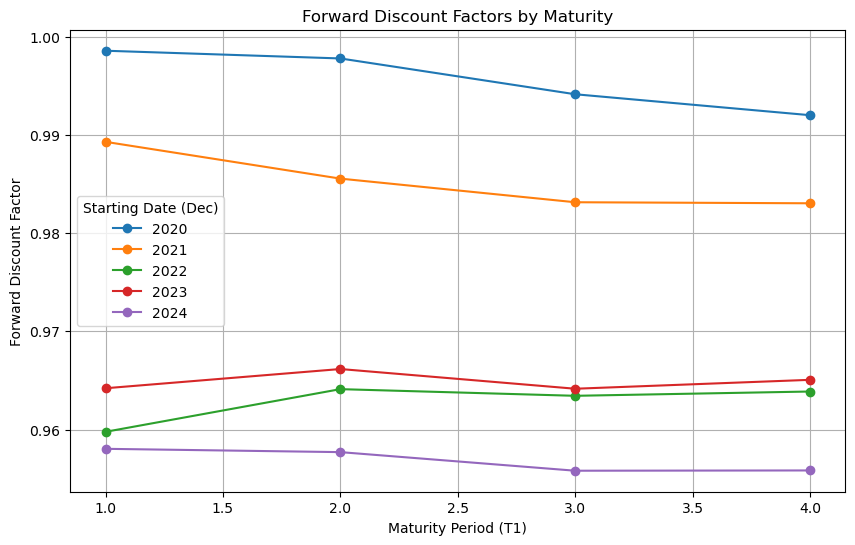

In [15]:
plt.figure(figsize=(10, 6))
for _, row in forward_df.iterrows():
    plt.plot(range(1, 5), [row.iloc[i] for i in range(1, 5)], marker='o', label=f"{row['date'].year}")

plt.xlabel("Maturity Period (T1)")
plt.ylabel("Forward Discount Factor")
plt.title("Forward Discount Factors by Maturity")
plt.legend(title="Starting Date (Dec)")
plt.grid(True)
plt.show()

### 3.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, on each date.

Make a plot of the curve, $f$, at each of these dates.

In [16]:
forward_rates = []
for _, row in forward_df.iterrows():
    forward_rates.append({
        'date': row['date'],
        1: -np.log(row.iloc[1]),
        2: -np.log(row.iloc[2]),
        3: -np.log(row.iloc[3]),
        4: -np.log(row.iloc[4])
    })

forward_rates_df = pd.DataFrame(forward_rates)
forward_rates_df

,date,1,2,3,4
0,2020-12-31,0.001441,0.002229,0.005889,0.008035
1,2021-12-31,0.010772,0.014564,0.017008,0.017115
2,2022-12-30,0.041064,0.036548,0.037252,0.036799
3,2023-12-29,0.036454,0.034427,0.036505,0.035566
4,2024-12-31,0.042869,0.043220,0.045199,0.045169


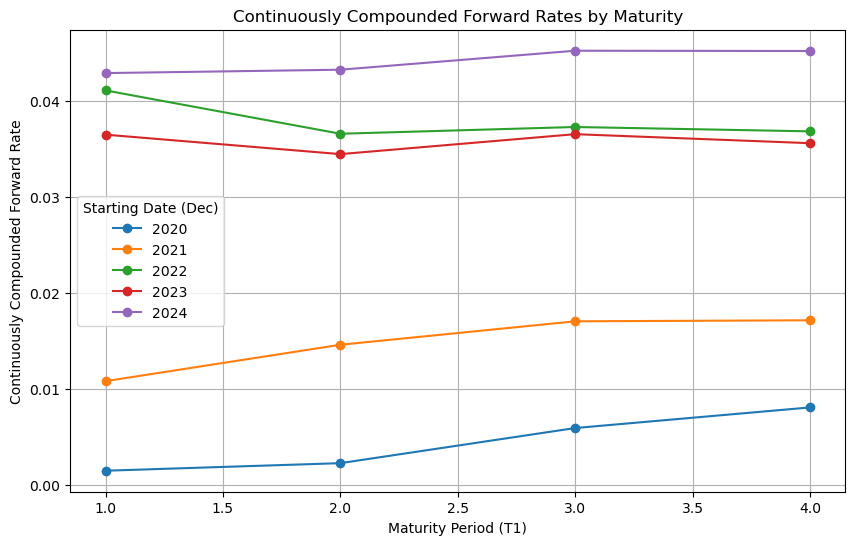

In [17]:
plt.figure(figsize=(10, 6))
for _, row in forward_rates_df.iterrows():
    plt.plot(range(1, 5), [row.iloc[i] for i in range(1, 5)], marker='o', label=f"{row['date'].year}")

plt.xlabel("Maturity Period (T1)")
plt.ylabel("Continuously Compounded Forward Rate")
plt.title("Continuously Compounded Forward Rates by Maturity")
plt.legend(title="Starting Date (Dec)")
plt.grid(True)
plt.show()

### 3.3

Calculate the continuously compounded spot rates, $r$, at these dates.

Plot both the forward curve and the spot curve on the date of `Dec 2020`.

Recall that $f(t,t,t+1) = r(t,t+1)$.

In [18]:
spot_rates = []
for _, row in forward_df.iterrows():
    spot_rates.append({
        'date': row['date'],
        1: -np.log(row.iloc[1]),
        2: (-np.log(row.iloc[1]) - np.log(row.iloc[2])) / 2,
        3: (-np.log(row.iloc[1]) - np.log(row.iloc[2]) - np.log(row.iloc[3])) / 3,
        4: (-np.log(row.iloc[1]) - np.log(row.iloc[2]) - np.log(row.iloc[3]) - np.log(row.iloc[4])) / 4
    })

spot_rates_df = pd.DataFrame(spot_rates)
spot_rates_df


,date,1,2,3,4
0,2020-12-31,0.001441,0.001835,0.003186,0.004399
1,2021-12-31,0.010772,0.012668,0.014115,0.014865
2,2022-12-30,0.041064,0.038806,0.038288,0.037916
3,2023-12-29,0.036454,0.035440,0.035795,0.035738
4,2024-12-31,0.042869,0.043044,0.043762,0.044114


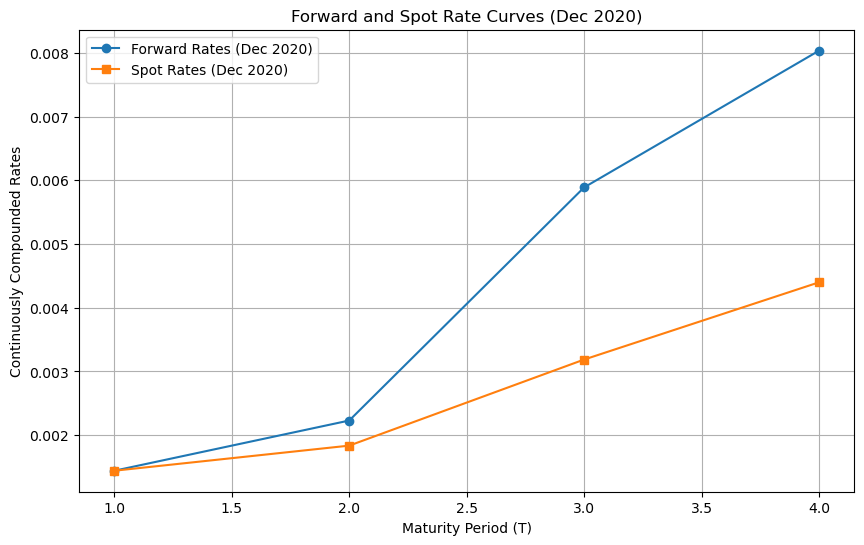

In [19]:
dec_2020_forward = forward_rates_df[forward_rates_df['date'].dt.year == 2020].iloc[:, 1:].values.flatten()
dec_2020_spot = spot_rates_df[spot_rates_df['date'].dt.year == 2020].iloc[:, 1:].values.flatten()

plt.figure(figsize=(10, 6))
maturities = range(1, 5)

plt.plot(maturities, dec_2020_forward, marker='o', label="Forward Rates (Dec 2020)")
plt.plot(maturities, dec_2020_spot, marker='s', label="Spot Rates (Dec 2020)")

plt.xlabel("Maturity Period (T)")
plt.ylabel("Continuously Compounded Rates")
plt.title("Forward and Spot Rate Curves (Dec 2020)")
plt.legend()
plt.grid(True)
plt.show()

### 3.4

Plot the forward curve on `Dec 2020` against the time-series evolution of $r(t,t+1)$ for dates $t$ between `Dec 2020` and `Dec 2024`.

How does the evolution of one-year rates between `2020-2024` compare to the forward rates of `2020`?

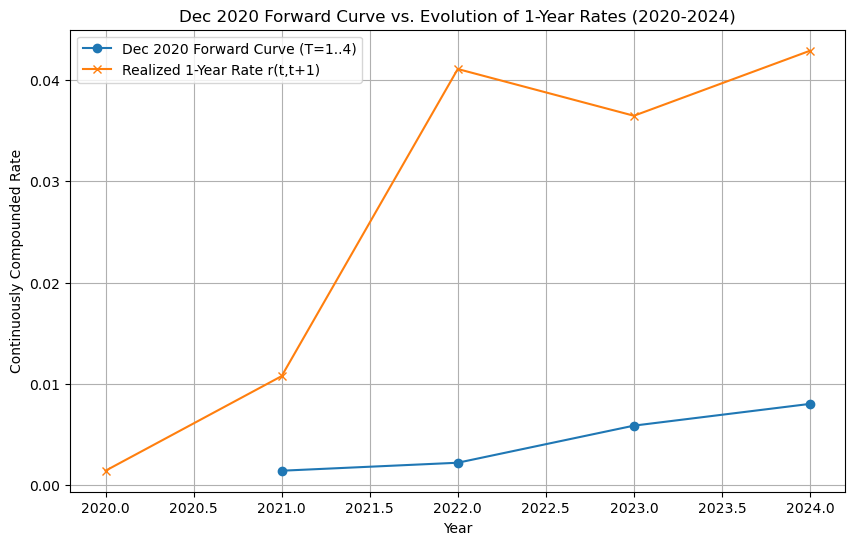

In [20]:

dec_2020_fwd = forward_rates_df[forward_rates_df['date'].dt.year == 2020].iloc[:, 1:].values.flatten()

one_year_series = forward_rates_df.set_index('date')[1]
one_year_series = one_year_series.loc[
    (one_year_series.index.month == 12) & (one_year_series.index.year >= 2020) & (one_year_series.index.year <= 2024)
]

plt.figure(figsize=(10, 6))

forecast_years = [2021, 2022, 2023, 2024]
plt.plot(forecast_years, dec_2020_fwd, marker='o', label='Dec 2020 Forward Curve (T=1..4)')

plt.plot(one_year_series.index.year, one_year_series.values, marker='x', label='Realized 1-Year Rate r(t,t+1)')

plt.xlabel("Year")
plt.ylabel("Continuously Compounded Rate")
plt.title("Dec 2020 Forward Curve vs. Evolution of 1-Year Rates (2020-2024)")
plt.grid(True)
plt.legend()
plt.show()


**Both the one year rates and forward rates are slopping upward, although there is a significant level difference between the two.**

***